In [412]:
!git add "td5_ressources/"
!git add "TD5_A_Simple_NN_for_a_Simple_LR.ipynb"

In [413]:
!git commit -m "reshaping TD5"
!git push origin master

[master de2e1d4] reshaping TD5
 3 files changed, 1536 insertions(+), 447 deletions(-)
 create mode 100644 td5_ressources/broadcoast1.png
 create mode 100644 td5_ressources/dot product.png
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 8 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 212.33 KiB | 9.65 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Luc-Bertin/TDs_ESILV.git
   bacc170..de2e1d4  master -> master


# TD5 • Coding a simple perceptron with Backprop

<h3> Un <a href="http://playground.tensorflow.org/#activation=linear&regularization=L1&batchSize=29&dataset=gauss&regDataset=reg-plane&learningRate=0.001&regularizationRate=0.003&noise=15&networkShape=1&seed=0.37334&showTestData=true&discretize=false&percTrainData=50&x=false&y=false&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false">lien sympathique</a> pour s'amuser avec différentes architectures de réseau de neurones </h3>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# A scalar

In [19]:
scalar = 4
scalar2 = np.array(4)
scalar, scalar2, scalar2.shape

(4, array(4), ())

# A vector

## Creation

In [54]:
vector_1D = np.array([4])
vector_1D_of_multiple_elements = np.array([1,2,3,4,5,6])

print(vector_1D, vector_1D_of_multiple_elements)
print(vector_1D.shape, vector_1D_of_multiple_elements.shape)
print(vector_1D.ndim, vector_1D_of_multiple_elements.ndim)

# Number of elements in the array
print(vector_1D.size, vector_1D_of_multiple_elements.size)

[4] [1 2 3 4 5 6]
(1,) (6,)
1 1
1 6


## Transpose vector

In [43]:
(vector_1D_of_multiple_elements.T,
 vector_1D_of_multiple_elements.T.shape) # same thing (in terms of representation)

(array([1, 2, 3, 4, 5, 6]), (6,))

In [44]:
(vector_1D_of_multiple_elements, 
vector_1D_of_multiple_elements.shape,
vector_1D_of_multiple_elements.ndim)

(array([1, 2, 3, 4, 5, 6]), (6,), 1)

# A matrix

## creation

In [39]:
matrix = np.array( [ 
            [ 1,2,3], 
            [ 4,5,6]
          ])

In [55]:
matrix, matrix.shape, matrix.ndim, matrix.size

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3),
 2,
 6)

## transpose matrix

In [56]:
matrix.T, matrix.T.shape, matrix.T.ndim, matrix.size

(array([[1, 4],
        [2, 5],
        [3, 6]]),
 (3, 2),
 2,
 6)

# Re-shape a vector or matrix

In [82]:
vector_1D.size

1

In [86]:
vector_1D.reshape((1,1))

array([[4]])

In [87]:
vector_1D.reshape((1,1,1))

array([[[4]]])

In [88]:
vector_1D_of_multiple_elements.size

6

In [89]:
vector_1D_of_multiple_elements.reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [90]:
vector_1D_of_multiple_elements.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

## pd.DataFrame

In [91]:
pd.DataFrame(vector_1D)

,0
0,4


In [92]:
pd.DataFrame(vector_1D_of_multiple_elements)

,0
0,1
1,2
2,3
3,4
4,5
5,6


In [93]:
pd.DataFrame(matrix)

,0,1,2
0,1,2,3
1,4,5,6


In [94]:
pd.DataFrame(vector_1D_of_multiple_elements) 

,0
0,1
1,2
2,3
3,4
4,5
5,6


In [95]:
pd.DataFrame(vector_1D_of_multiple_elements.T)

,0
0,1
1,2
2,3
3,4
4,5
5,6


In [96]:
pd.DataFrame(vector_1D_of_multiple_elements).shape

(6, 1)

In [97]:
pd.DataFrame(vector_1D_of_multiple_elements).T

,0,1,2,3,4,5
0,1,2,3,4,5,6


# Vector "as" matrix

In linear algebra, a **column vector** or **column matrix** is an **m × 1 matrix**, that is, a **matrix consisting of a single column of m elements**

In [120]:
as_matrix = vector_1D_of_multiple_elements.reshape(6, 1) # 6 rows, 1 column

In [121]:
pd.DataFrame(as_matrix)

,0
0,1
1,2
2,3
3,4
4,5
5,6


Similarly, a row vector or row matrix is a 1 × m matrix, that is, a matrix consisting of a single row of m elements

In [123]:
as_matrix = vector_1D_of_multiple_elements.reshape(1, 6) # 1 column, 6 rows

In [124]:
pd.DataFrame(as_matrix)

,0,1,2,3,4,5
0,1,2,3,4,5,6


# Dot Product (produit scalaire)

In [125]:
vector1 = np.array([1,2,3,4,5])
vector2 = np.array([2,4])

In [126]:
try:
    np.dot( vector1, vector2 )
except:
    print("Not the same number of elements to perform a dot product (must be aligned)")

Not the same number of elements to perform a dot product (must be aligned)


In [127]:
vector2 = np.array([2,4,1,1,1])

In [128]:
np.dot(vector1, vector2) # 1*2 + 2*4 + 3*1 + 4*1 + 5*1

22

In [131]:
try:
    np.dot(vector1.reshape(1,5), vector2.reshape(1,5))
except:
    print("Again, not aligned because in maths you do the transpose of the vector1 ")

Again, not aligned because in maths you do the transpose of the vector1 


<img src="td5_ressources/dot product.png" width="100%">

In [143]:
# this works
result_dot_product = np.dot(vector1.reshape(1,5), vector2.reshape(1,5).T)
# this works
result_matrix_product = np.matmul(vector1.reshape(1,5), vector2.reshape(1,5).T)
# same result
result_dot_product, result_matrix_product

(array([[22]]), array([[22]]))

# elementwise multiplication (Hadamard Product on Matrices (or column/row vector)
To not confuse with dot product:

In [147]:
vector1 * vector2 # vector of element multiplications

array([2, 8, 3, 4, 5])

In [148]:
# same result
np.multiply(vector1, vector2)

array([2, 8, 3, 4, 5])

In [152]:
np.multiply(vector1.reshape(1,5), vector2.reshape(1,5))

array([[2, 8, 3, 4, 5]])

# Broadcasting rules numpy

refers to how numpy **treats arrays** with **different shapes** during **arithmetic operations**.<br>
Subject to certain constraints, the **smaller array is “broadcast” across the larger array** so that they have compatible shapes!

* Same shapes, no problem:

In [167]:
vector1 = np.array([1,2,3])
vector2 = np.array([1,2,3])

vector1 + vector2

array([2, 4, 6])

* different shapes, what to do ? 

In [176]:
vector1 = np.array([1])
vector2 = np.array([1,2,3])
vector1.shape, vector2.shape

((1,), (3,))

In [177]:
vector1 + vector2

array([2, 3, 4])

This is the same thing as:

In [183]:
vector1_transformed = np.tile(vector1, reps=(1,3))
print( vector1_transformed )

vector1_transformed + vector2

[[1 1 1]]


array([[2, 3, 4]])

<img src="td5_ressources/broadcoast1.png" width="100%">

> from https://cs231n.github.io/python-numpy-tutorial/#numpy-broadcasting:
* If the arrays do not have the same rank (number of dimensions), **prepend the shape of the lower rank array** with **1s until both shapes have the same length**.
* The two arrays **are said to be compatible** in **a** dimension if they have the **same size** in the dimension, or if one of the arrays **has size 1** in **that** dimension.
* The arrays can be broadcast together if they **are compatible in all dimensions**.


After broadcasting:
* After broadcasting, each array **behaves as if it had shape equal to the elementwise maximum of shapes** of the two input arrays.
* In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves **as if it were copied along that dimension**.

In [196]:
vector1 = np.array([[1]])
vector2 = np.array([1,2,3])
vector1.shape, vector2.shape

((1, 1), (3,))

prepending ones, the last dimension of the array will be "strecthed" so the number of elements match with the one of the first array

In [197]:
vector1 + vector2

array([[2, 3, 4]])

<u>**Example2:**</u>

In [236]:
vector1 = np.array([[1], [2]]) # 2 rows, 1 column
vector2 = np.array([1,2,3]) # 1D vector
vector1.shape, vector2.shape

((2, 1), (3,))

1. 2 rows in `vector1`, `vector2` does not have "rows dimension", prepended a 1 to create a new dimension
2. then `vector2` is stretched on its new dim so to have 2 elements, as `vector1` 
3. while `vector1` has last dimensions (columns) strecthed to have 3 elements, as `vector2`

In [237]:
vector1 + vector2 

array([[2, 3, 4],
       [3, 4, 5]])

This is the same as:

In [241]:
vector2

array([1, 2, 3])

In [242]:
np.tile(vector2, reps=(2, 1))

array([[1, 2, 3],
       [1, 2, 3]])

In [243]:
np.tile(vector1, reps=(1, 3))

array([[1, 1, 1],
       [2, 2, 2]])

<u>**Example3:**</u>

In [260]:
vector1 = np.array([[1, 4, 5], [2, 2, 5]]) # 2 rows, 1 column
vector2 = np.array([1, 2]) # 1D vector
vector1.shape, vector2.shape

((2, 3), (2,))

In [263]:
try:
    vector1 + vector2
except Exception as e:
    print("After prepending with 1 the vector2, impossible to match 2 to 3:\n{}".format(e))

After prepending with 1 the vector2, impossible to match 2 to 3:
operands could not be broadcast together with shapes (2,3) (2,) 


# Finding the parameters in a simple linear regression case

## The data

In [265]:
%matplotlib inline

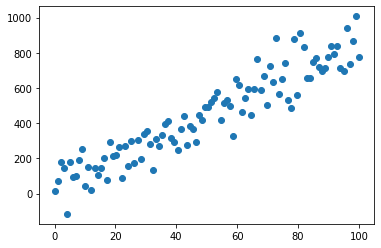

In [278]:
x = np.linspace(0, 100, 100)
y = 8*x + np.random.normal(x, 100) # y = 8*x + epsilon with epsilon ~ N(0,1)
plt.scatter(x, y)
plt.show()

How to find the coefficient $\beta$s (here the intercept $\beta$0 and the slope $\beta$1) in order to have the best fitting (simple) linear model ? 

## The plotting function

In [401]:
def plotting(beta0, beta1):
    plt.scatter(x_scaled_and_centered, y)
    plt.plot(x_scaled_and_centered, lm.intercept_ + lm.coef_ * x_scaled_and_centered, color='r')

## Using OLS

In [281]:
from sklearn.linear_model import LinearRegression
# adding one dimension to the x (to have a feature matrix notation,
# although x is only 1 feature,
# which then can be apparented as a column vector
lm = LinearRegression().fit(x[:, np.newaxis], y)
lm.intercept_, lm.coef_

(37.18580177143173, array([8.22801749]))

With standardization before:

In [293]:
from sklearn.preprocessing import StandardScaler
x_scaled_and_centered = StandardScaler().fit_transform(x[:, np.newaxis])
lm = LinearRegression(fit_intercept=True).fit(x_scaled_and_centerd, y)
lm.intercept_, lm.coef_

(448.5866764712714, array([239.90962559]))

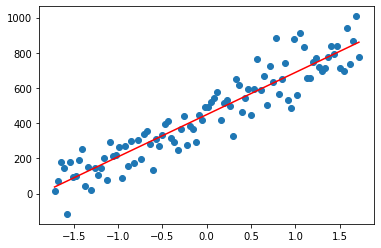

In [402]:
plotting(lm.intercept_, lm.coef_)

## Using a self-made (definitely non-optimised) algorithm

In [387]:
def algo_simple_linreg(x, y):
    """A self-made, definitely non-optimised algorithm to find the best alpha and beta values:"""
    from sklearn.metrics import mean_squared_error
    MSE = {}
    for beta0 in np.linspace(-5000, 5000, 100):
        for beta1 in np.linspace(-5000, 5000, 100):
            model = lambda x: beta0 + beta1*x
            mse = mean_squared_error( model(x), y)
            MSE[(beta0, beta1)] = mse
    return MSE

In [389]:
MSE = algo_simple_linreg(x_scaled_and_centered, y)

In [390]:
params = pd.Series(MSE).unstack()

<AxesSubplot:>

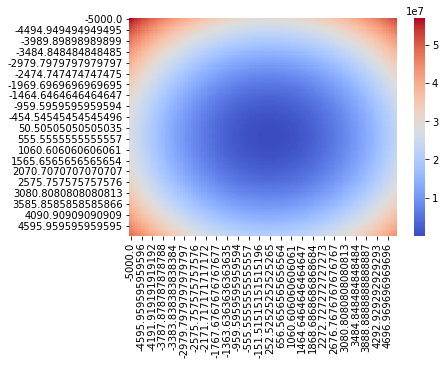

In [391]:
import seaborn as sns
ax = plt.subplot(111)
sns.heatmap(params, cmap="coolwarm", ax=ax)

In [400]:
params.stack().idxmin()

(454.54545454545496, 252.52525252525265)

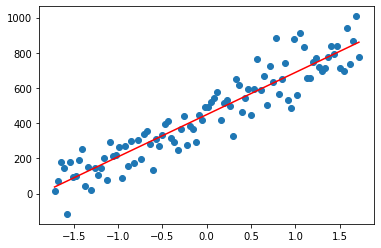

In [403]:
plotting(*params.stack().idxmin())

## Using One neuron 🤓

###  Definition

2 nice definitions i like, just stolen from [there](https://people.minesparis.psl.eu/fabien.moutarde/ES_MachineLearning/Slides/MLP-NeuralNetworks_course_2pp.pdf)

> A **processing “unit”** applying a **simple operation to its inputs**, and which can be **“connected” to others** to build a **network** able to realize any input-output function 

> “Usual” definition: a “unit” computing a **weighted sum of its inputs**, that can add a constant term, and **apply some non-linearity (sigmoïd, ReLU, ...)**

<img src="td4_ressources/img_perceptron_towards_data_science.png" width=500>

## Behavior formulas

From the last definition of what a neuron is we get:

From the last definition of what a neuron is we get:

1. <span style="color: red;">Weighted sum of its inputs</span> and <span style="color: blue;">can add a constant term<span>.

$$ f(x_i) =  \color{red}{\sum_{i=1}^{p}{w_i x_i}}   + \color{blue}{cst}$$

2. Apply some <span style="color: green;">non-linearity function g</span>:<br>
    Example: sigmoid function (g is Sigmoid)
    $$ g(z) = Sigmoid(z) = \color{green}{\frac{1}{1+e^{-z}}} $$

**Then the output of the neuron is:**
$$ y_i = ( g \circ f ) (x) = g(f(x)) = \color{green}{\frac{1}{1+e^{-\color{red}{\sum_{i=1}^{p}{w_i x_i}}   + \color{blue}{cst}}}} $$

Seems that **<span style='color: red;'><u>1.</u></span>** look very similar to a simple linear regression formula !<br>
- The **weights** $w_i$ can be seen as the **coefficients** of a linear regression.
- The $x_i$ as the **features** of **one** data point (one **row vector** then i.e. **one line of a matrix** or one observation in a **dataframe** !). There is $p$ features for one input vector here using the former notation.
- The output $y_i$ is a scalar, that is, the output for one input vector of features $i$

We can rewrite this formula in **vector notation**, so we could scale this to **multiple input vectors**.

$$  Y = (g \circ f) (X) = g( X W + B ) $$

or maybe using the indices so it is a little bit clearer

$$  Y_{k,1} = (g \circ f) (X_{k,p}) = g( X_{k,p} W_{p,k} + B_{k,1} ) $$

Where $X$ is a **row vector of p features** (or a **matrix of n row vectors of p features**).<br>
This notation is useful as it could be used for one single input, or many.
- if **one input row vector** is passed, then, it is a **simple dot product** between this vector and a column **weights vector** occur, forming one scalar output $Y_{1,1}$.
- if multiple inputs are being passed (size $k x p$), then W is a matrix of size $p x k$, so that Y has k output (one for each input) and that each feature of x is multiplied by its corresponding feature in W, forming finally a vector of outputs $Y_{k,1}$.

Let's see the simple linear regression as a specification of multiple linear regression: $W_{k,p}$ for k inputs of p features

In [427]:
x = x[:, np.newaxis] # to set x as a matrix of row vectors of 1 feature 

In [428]:
W = np.random.random(size=tuple(reversed(x.shape))) # all are between 0 and 1 for stability at first

the bias term:

In [430]:
B = np.random.random(size=(x.shape[0], 1))

## Loss and Risk function

Remembered the cost function ?<br>
Let's take a **quadratic loss** as it is **nicely differentiable**,<br>

Let's write: $$ z = (g \circ f) $$

then:

$$ L(y_i, \hat{y}_i) = L(y_i, z(x_i)) = (y_i - z(x_i))^2 $$

Then in matrix notation:

$$ L(Y_{k,1}, \hat{Y}_{k,1}) = L(Y_{k,1}, z(X_{k,p}) =  (Y_{k,1} - z(X_{k,p}))^2 $$


Hence the result is a vector of loss for each output.

The cost function is the **expected loss value**, if we use the quadratic loss it then becomes the **Mean Squared error**.

$$ MSE = \sum_{i=1}^{n}{ ( y_i - z(x_i) )^2}$$

and in matrix notation:

$$ MSE = E[L(Y_{k,1}, \hat{Y}_{k,1})]= E[ (Y_{k,1} - z(X_{k,p}))^2 ) ] $$

## Backpropagation

At first the weights (coefficients for a linear regression here) are chosen **randomly**.<br>
Of course, if we knew them before, why would we use an algorithm ? :P

We are going to use **Gradient descent**: a **first-order** iterative optimization algorithm for **finding a local minimum of a differentiable function**. We want to minimize the errors produces, we will perform the gradient descent of the loss function. It implies computing the derivative of the loss function w.r.t. the weights. The **quadratic loss function** is then a good choice here as it is differentiable.

Computing the gradient of the **loss function** with respect to the **weights** enable us to later find the direction in the weight/parameter space that **minimizes the loss**.

This derivative can be done in 2 different ways:
- each iteration can use **one input vector**. Each of the weights will be updated computing the derivative on the loss function w.r.t. the weights for **that single input vector** that had been passed forward to compute the output and so the errors, this is named: **stochastic gradient descent**.
- or each iteration can use a **batch of multiple vectors** (extreme case is using a bach equaling to the training set, the whole data available, that is, **k row vectors**) to compute the **expected loss value for that batch of inputs**, this is named: **batch gradient descent**. This means that each weight will be updating by the same quantity **meaned** over the grouped information from the predictions errors drawn from passing **k input vectors**.  

Once computed, the gradient points **uphill** (maximize the loss), so we need to update the weights taking the opposite direction. Also we will carefully take each update a **little step in this same direction** by using the (negation of the) derivative by a coefficient also called **learning rate**: since it influences to what extent **newly acquired information overrides old information** (wikipedia always gives the best quote).









<img src="td5_ressources/batch_gradient_formula.png" width="100%">

<img src="td5_ressources/stochastic_gradient_formula.png" width="100%" >

<img src="td5_ressources/gradient_descent.png" width="100%">

How to compute such gradient w.r.t. to the weights ? well  are going to use the **chain rule** !

<img src="td4_ressources/img_formula_gradient_descent_backprop_mattmazur.png" width=600>

<img src="td5_ressources/img_explanations_Bertin_Luc.png">

# Time to implement it 

In [90]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class Neural_Network_1neuron:
    
    def __init__(self, X, y, nb_epochs=100, fixed_bias=False, learning_rate=0.03):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.20)
        self.X_train, self.X_test = self.scale_values(self.X_train, self.X_test)
        self.y_train, self.y_test = \
            np.reshape(self.y_train, (len(self.y_train),1)),\
            np.reshape(self.y_test, (len(self.y_test),1))
        
        self.weights = [] * X.shape[1]  # as many weights as features, here 1
        self.weights = self.init_weights(X)
        self.bias, self.fixed_bias    = 0, fixed_bias
        self.training_predictions, self.mse = 0, 0
        self.learning_rate = learning_rate
        self.nb_epochs = nb_epochs
        self.weights_update, self.bias_update = 0, 0
        self.records = pd.DataFrame([[self.weights, self.bias,0]], columns=['weights', 'bias', 'mse'])
    
    def scale_values(self, X_train, X_test):
        scale   = StandardScaler()
        X_train = scale.fit_transform(X_train)
        X_test  = scale.transform(X_test)
        return X_train, X_test
        
    def init_weights(self, X):
        nb_of_features_input = X.shape[1]
        return np.random.randint(-2,2, (nb_of_features_input, 1))
    
    def activation(self):
        return x
    def derivate_activation(self):
        return 1
    
    def forward_pass(self):
        self.training_predictions = np.dot(self.X_train, self.weights) + self.bias
    
    def compute_mse(self):
        self.mse = 1/(2*len(self.X_train)) * sum( ( self.training_predictions - self.y_train)**2 )
    
    def backpropagation(self):
        # derivative of error by weights so to update them along with bias
        # dE/dw = dE/da * da/dz * dz/dw
        # w = w - n*dE/dw
        # E = mse = (1/2n)* sum(( predictions(==activations) - target)**2) ON ALL TRAINING EXAMPLES
        
        self.dE_da = self.training_predictions - self.y_train #for all training examples
        
        self.da_dz = self.derivate_activation() # derivate of activation
        
        self.dz_dw = self.X_train     # z = W*X + bias => dz_dw = X    
        
        self.weights_update, self.bias_update = \
            ( 1 / self.X_train.shape[0] ) * np.reshape( sum( self.dE_da * self.da_dz * self.dz_dw), (self.X_train.shape[1], 1) ),\
            ( 1 / self.X_train.shape[0] ) * sum( self.dE_da * self.da_dz ),  # weights updates, bias update
    
    def update(self):
        self.weights = self.weights - self.learning_rate * self.weights_update
        self.bias    = self.bias    - self.learning_rate * self.bias_update if not self.fixed_bias else self.bias
        
    def predict(self):
        return np.dot(self.X_test, self.weights) + self.bias
    
    def run(self):
        for i in range(1, self.nb_epochs):
            self.forward_pass()
            self.compute_mse()
            self.backpropagation()
            self.update()
            self.records.loc[i] = [self.weights, self.bias, self.mse]  
        return self.records

In [91]:
unReseauDeNeurone = Neural_Network_1neuron(X, y, nb_epochs=2000)

In [11]:
records= unReseauDeNeurone.run()

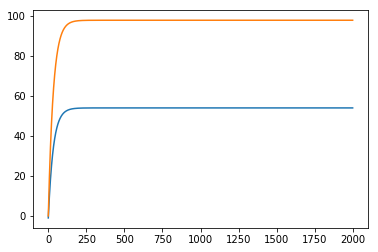

In [12]:
plt.plot(records['weights'])
plt.plot(records['bias'])

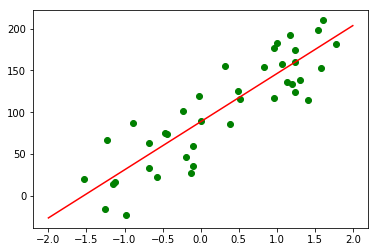

In [16]:
from sklearn.preprocessing import StandardScaler
plt.scatter(x=unReseauDeNeurone.X_test, y= unReseauDeNeurone.y_test, color='green')
x_ = np.linspace(-2, 2, 100).reshape((100,1))
y_ = float(unReseauDeNeurone.weights)*x_ + float(unReseauDeNeurone.bias)
plt.plot(x_, y_, color='red')

<IPython.core.display.Javascript object>


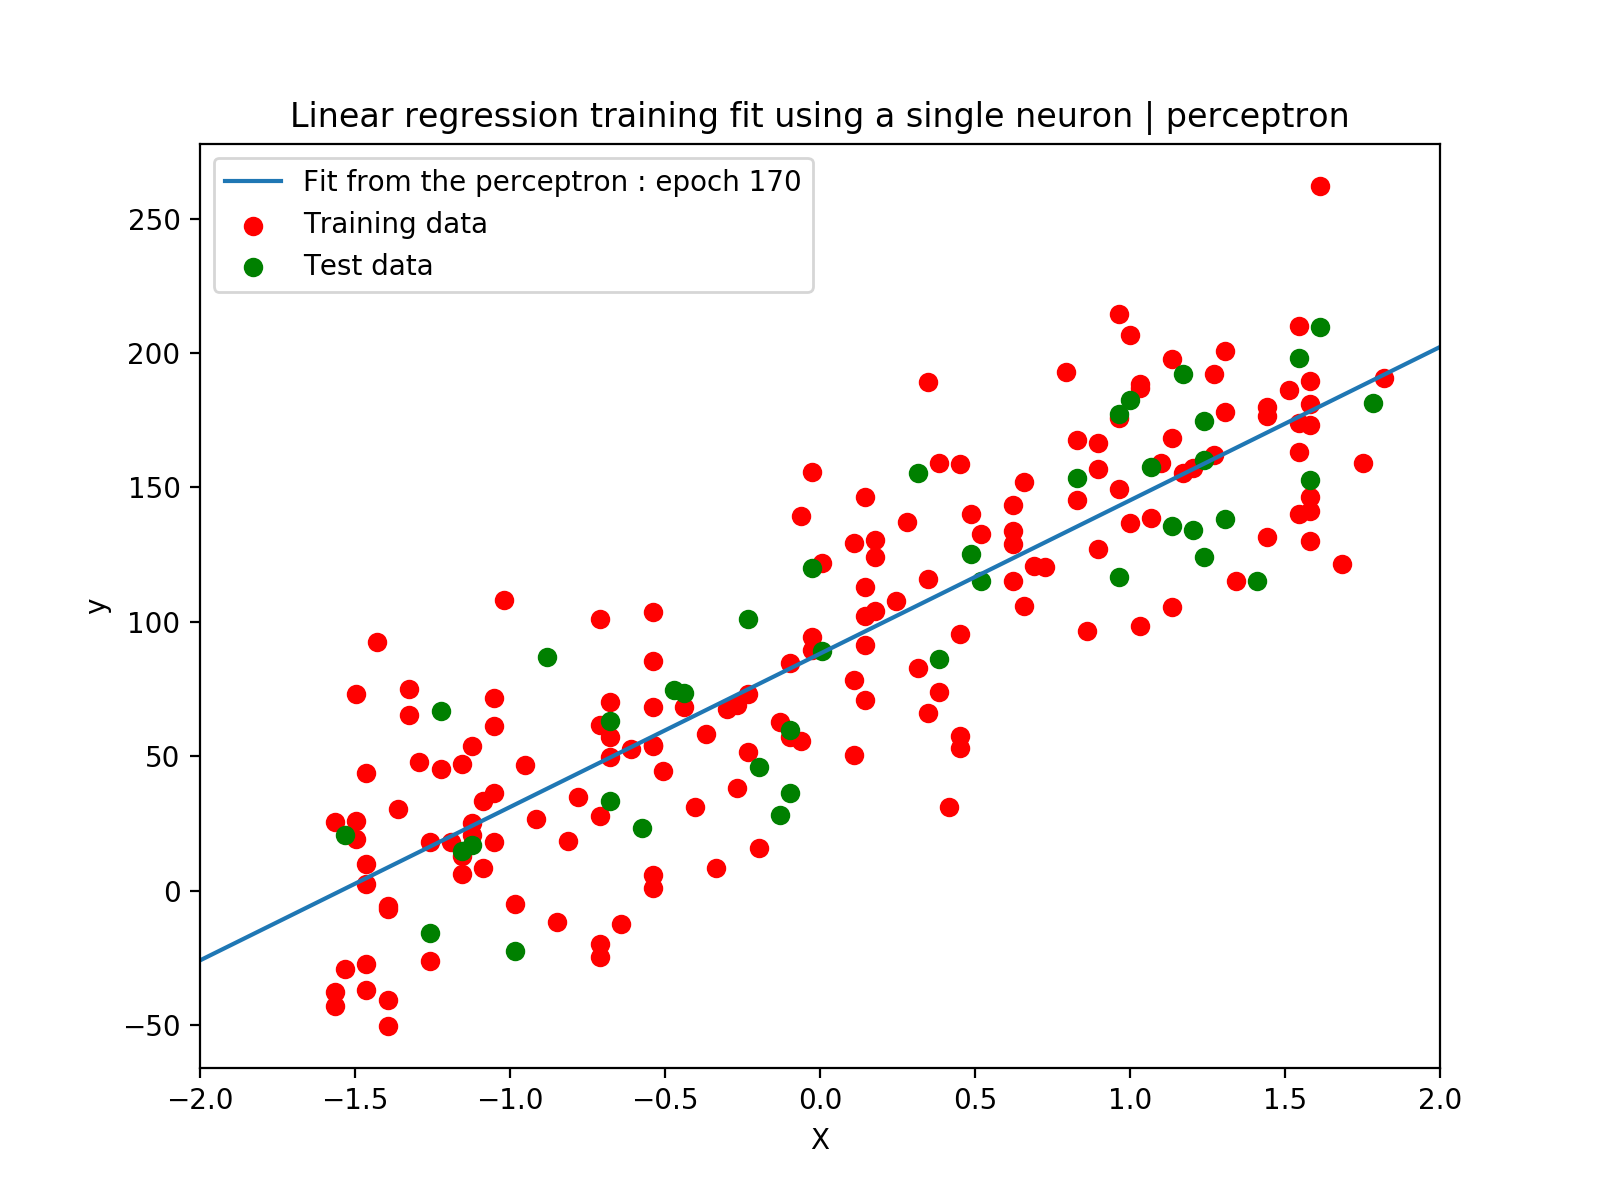

In [18]:
%matplotlib notebook

import matplotlib.animation as animation

fig, ax = plt.subplots()
# Initial plot
x_ = np.linspace(-2, 2, 100).reshape((100,1))
y_ = float(records.loc[0, "weights"])*x_ + float(records.loc[0, "bias"])

line, = ax.plot(x_, y_, label="Fit from the perceptron")

plt.rcParams["figure.figsize"] = (8,6)
plt.ylabel("y")
plt.xlabel("X")
plt.scatter(x=unReseauDeNeurone.X_train, y= unReseauDeNeurone.y_train, color='red', label="Training data")
plt.scatter(x=unReseauDeNeurone.X_test, y= unReseauDeNeurone.y_test, color='green', label="Test data")
plt.xlim(-2, 2)
plt.legend()
plt.title("Linear regression training fit using a single neuron | perceptron")

def animate(i):
    line.set_label("Fit from the perceptron : epoch {}".format(i))
    plt.legend()
    x_ = np.linspace(-2, 2, 100).reshape((100,1))
    line.set_xdata(x_)  # update the data
    line.set_ydata( float(records.loc[i, "weights"])*x_ + float(records.loc[i, "bias"]))# update the data
    return line,


In [19]:
ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, len(records)), interval=100)
plt.show()

## Time to try with multiple features ;-)

In [5]:
from sklearn.datasets import load_boston

In [6]:
X, y=load_boston(True)

In [28]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [29]:
pd.DataFrame(y)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lm.coef_

array([-0.71783248,  1.02217869,  0.08740028,  0.71198368, -1.93720454,
        2.6902591 , -0.29942367, -3.06743567,  2.42462406, -2.19758343,
       -1.9749823 ,  0.70179246, -3.37036623])

In [94]:
unReseauDeNeurone = Neural_Network_1neuron(X, y, nb_epochs=5000, fixed_bias=True)

In [37]:
unReseauDeNeurone.forward_pass()

In [38]:
unReseauDeNeurone.compute_mse()

In [39]:
unReseauDeNeurone.backpropagation()

In [41]:
unReseauDeNeurone.weights_update

array([[ 1.17112081],
       [-2.80716197],
       [ 2.20648337],
       [-2.60100595],
       [ 1.53649353],
       [-6.35267367],
       [ 0.98673239],
       [ 0.08818374],
       [ 0.99814613],
       [ 1.83668694],
       [ 4.40765325],
       [-1.63153833],
       [ 5.02196791]])

In [42]:
unReseauDeNeurone.update()

In [43]:
unReseauDeNeurone.weights, unReseauDeNeurone.bias

(array([[-1.03513362],
        [-0.91578514],
        [-1.0661945 ],
        [-0.92196982],
        [ 0.95390519],
        [ 0.19058021],
        [-2.02960197],
        [ 0.99735449],
        [-2.02994438],
        [-0.05510061],
        [ 0.8677704 ],
        [ 0.04894615],
        [ 0.84934096]]), 0)

In [95]:
unReseauDeNeurone.run()

,weights,bias,mse
0,"[[-1], [0], [-2], [0], [-1], [1], [1], [1], [-...",0,0
1,"[[-0.954751010209966], [-0.013674617870086414]...",0,[283.5274015158353]
2,"[[-0.915878880049378], [-0.02181129653714221],...",0,[281.9910148810309]
3,"[[-0.8822887452345379], [-0.025521284899771006...",0,[280.70361134082754]
4,"[[-0.8530839223863985], [-0.025709214771168908...",0,[279.60149612835266]
...,...,...,...
4995,"[[-1.0451495139155587], [1.1219203100379627], ...",0,[265.6211373395594]
4996,"[[-1.0451495569992986], [1.1219203780884632], ...",0,[265.6211373395316]
4997,"[[-1.0451496000035996], [1.1219204460134908], ...",0,[265.6211373395042]
4998,"[[-1.0451496429286082], [1.1219205138132768], ...",0,[265.62113733947683]


### Visualization • Multiple regression line

In [96]:
lm.coef_

array([-0.71783248,  1.02217869,  0.08740028,  0.71198368, -1.93720454,
        2.6902591 , -0.29942367, -3.06743567,  2.42462406, -2.19758343,
       -1.9749823 ,  0.70179246, -3.37036623])

In [97]:
at_499  = unReseauDeNeurone.records.loc[499, "weights"].reshape((13,))
at_1999 = unReseauDeNeurone.records.loc[1999, "weights"].reshape((13,))
at_4999 = unReseauDeNeurone.records.loc[4999, "weights"].reshape((13,))

<BarContainer object of 13 artists>

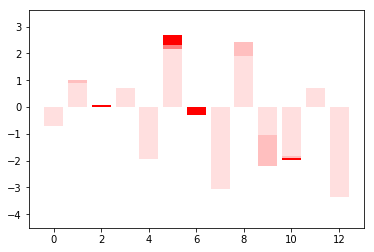

In [109]:
plt.bar(x=np.arange(len(lm.coef_)), height=lm.coef_, color='red')
plt.bar(x=np.arange(len(lm.coef_)), height=at_499, color='white', alpha = 0.5)
plt.bar(x=np.arange(len(lm.coef_)), height=at_1999, color='white', alpha = 0.5)
plt.bar(x=np.arange(len(lm.coef_)), height=at_4999, color='white', alpha = 0.5)

## In Keras ? 

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [30]:
import pandas as pd

In [22]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [23]:
model = Sequential()
model.add(Dense(1, input_shape=(X.shape[1],), activation='linear'))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=sgd)

## A callback to store weights

In [3]:
from keras.callbacks import LambdaCallback

In [24]:
df_weights = {}
def save_weights(epoch, logs):
    df_weights[epoch] = model.layers[0].get_weights()

In [27]:
keep_weights = LambdaCallback(on_epoch_end=save_weights)

In [28]:
history = model.fit(x=X_train, y=y_train, 
                    batch_size=X_train.shape[0], epochs=500, 
                    validation_data=(X_test, y_test), 
                    verbose=0, callbacks=[keep_weights])

In [31]:
weights = pd.DataFrame(df_weights).T

In [33]:
weights

,0,1
0,"[[-0.41488618], [-0.26718292], [-0.06884424], ...",[0.44534156]
1,"[[-0.47011578], [-0.20525149], [-0.14348623], ...",[0.88177645]
2,"[[-0.51783484], [-0.15079129], [-0.20821002], ...",[1.3094825]
3,"[[-0.558973], [-0.102887556], [-0.26424813], [...",[1.7286345]
4,"[[-0.594346], [-0.060737662], [-0.3126816], [-...",[2.1394033]
...,...,...
495,"[[-0.5647306], [0.754945], [-0.183919], [0.756...",[22.266088]
496,"[[-0.5650083], [0.7556748], [-0.18366277], [0....",[22.266108]
497,"[[-0.5652857], [0.7564024], [-0.18340692], [0....",[22.266127]
498,"[[-0.5655627], [0.75712776], [-0.18315144], [0...",[22.266146]


In [34]:
history.params

{'batch_size': 404,
 'epochs': 500,
 'steps': None,
 'samples': 404,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'val_loss']}

In [35]:
losses_ = pd.DataFrame(history.history)

In [37]:
%matplotlib inline

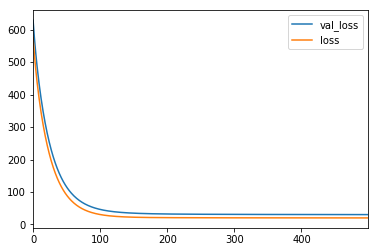

In [39]:
losses_.plot(kind="line")

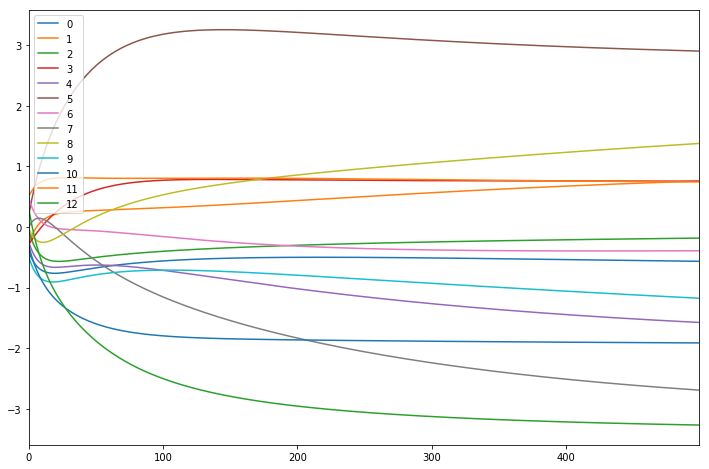

In [129]:
ax_weights = plt.subplot(111)
weights[0].apply(lambda x: pd.Series(x.reshape(-1))).plot(kind='line', figsize=(12,8), ax=ax_weights)
#ax_weights.hlines(lm.coef_, ax_weights.get_xticks().min(), 
#                  ax_weights.get_xticks().max(), linestyle='--', color='r', alpha=0.2)

<BarContainer object of 13 artists>

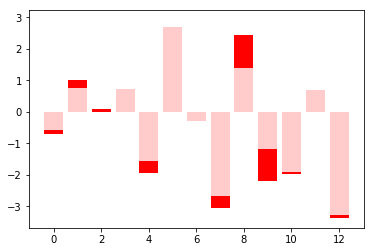

In [53]:
at_499  = weights.loc[499, 0].reshape(-1)
plt.bar(x=np.arange(len(lm.coef_)), height=lm.coef_, color='red')
plt.bar(x=np.arange(len(lm.coef_)), height=at_499, color='white', alpha = 0.8)

In [51]:
history.model.get_weights()

[array([[-0.56583947],
        [ 0.757851  ],
        [-0.18289633],
        [ 0.75625217],
        [-1.574401  ],
        [ 2.9033177 ],
        [-0.39176258],
        [-2.6906116 ],
        [ 1.3781797 ],
        [-1.1749481 ],
        [-1.9126912 ],
        [ 0.74386007],
        [-3.2675798 ]], dtype=float32), array([22.266165], dtype=float32)]

# Fin.